In [163]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import pandas as pd
import util.utilities as util
from collections import Counter

In [164]:
pd.set_option('display.max_colwidth',255)
df_sms_extraction = util.load_dataset(my_path='../../dataset/Extraction_form_basic.xlsx')
df_sms_extraction = util.add_column_sp(df_sms_extraction)

# Q4 Tools and Methods

In [165]:
# 3.5) Q4 Tools and Methods

dict_q4 = {}
for item in zip( list(df_sms_extraction['Paper Id']), list(df_sms_extraction['Q4(Techniques and tools)']) ):
    id = item[0]
    if (item[1] != ''):
        q4 = str(item[1])
        q4 = ' '.join(q4.split())
        dict_q4[id] = q4.lower()
dict_q4

{1: 'general:"model-driven architecture approach, natural language processing, machine learning, heterogeneous artefacts" # approuch:"rebel focuses on finding atd items at architecture level only, measuring the impact of its repayment strategy based on architecture decisions and allowing the debt to be anticipated or corrected before the implementation process begins # tools:"rebel"',
 2: 'general:"specialist technical evaluation, modularity, measurement system, complexity, cohesion, coupling, code churn, source code, revision history" # approuch:"own technique to identify, measure and calculate the atd" # tools:"proprietary tool"',
 3: 'general:"architecture smells, modularity" # approuch:"unstable dependency, hub-like dependency, cyclic dependency, implicit cross package dependency, " # tools:"arcan, sonarqube, apache commons bcel, hellow2morrow"',
 4: 'general:"architectural root, source code, revision history, design structure matrix, code churn, change frequency, architectural sme

## Tools

In [166]:
## Q4.1 Tools

list_of_tat, list_of_techniques, list_of_approaches, list_of_tools = util.extract_techniques_approuches_tools(df_sms_extraction, column_name="Q4(Techniques and tools)")

print("List of tools: ")
list_of_tools.sort()
print(list_of_tools)

list_of_tools = Counter(list_of_tools).most_common()

List of tools: 
[' ', ' ', "  'Titan'", '  latix', ' "ACME-Generator Tool"', ' "Arcan"', ' "ArchDia"', ' "DV8"', ' "No"', ' "Rebel"', ' "Skuld"', ' "SonarQube"', ' "Sonargraph"', ' "Sonarqube"', ' "Sonarqube"', ' "no"', ' "no"', ' "no"', ' "no"', ' "proprietary formula"', ' "proprietary formulas"', ' "proprietary tool to visualize dependency among components"', ' "proprietary tool"', ' "proprietary tool"', ' "proprietary tool"', ' "proprietary tool"', ' "proprietary"', ' "proprietary"', ' "proprietary"', ' "proprietary"', ' "proprietary"', ' "proprietary"', ' "questionaries"', " 'Arcan'", ' Understand', '""', 'ASTracker', 'Apache Commons BCEL', 'Arcan', 'Arcan', 'CAST', 'CAST', 'Cast', 'Checkstyle', 'CodeCov', 'DV8', 'Error Prone', 'Findbugs', 'Fusion', 'FxCorp', 'Git', 'GraphML', 'InFusion', 'Jira', 'Jmetrics', 'Lattix', 'PMD', 'Self-made tool', 'Simian', 'SonarGraph', 'SonarQube', 'SonarQube', 'SonarQube', 'SonarQube Structure101', 'Sonargraph', 'Sonarqube', 'Titan', 'Understand', 'U

In [167]:
list_of_main_tools = ['SonarQube', 'Arcan','CAST', 'Understand', 'ACME-Generator Tool', 'ArchDia','DV8', 'Rebel', 'Sonargraph',
 'Understand','ASTracker','Apache Commons BCEL', 'Checkstyle','CodeCov', 'Error Prone', 'Findbugs',
 'Fusion', 'FxCorp', 'GraphML', 'InFusion', 'Jmetrics', 'Lattix','PMD','Simian','Structure101', 'Titan',
 'dependency-analyser','hellow2morrow','titan', 'skuld']

list_of_main_tools = [each.lower() for each in list_of_main_tools]
print(list_of_main_tools)

['sonarqube', 'arcan', 'cast', 'understand', 'acme-generator tool', 'archdia', 'dv8', 'rebel', 'sonargraph', 'understand', 'astracker', 'apache commons bcel', 'checkstyle', 'codecov', 'error prone', 'findbugs', 'fusion', 'fxcorp', 'graphml', 'infusion', 'jmetrics', 'lattix', 'pmd', 'simian', 'structure101', 'titan', 'dependency-analyser', 'hellow2morrow', 'titan', 'skuld']


In [168]:
list_of_other_tools = ['no', 'proprietary tool','proprietary formula', 'proprietary formulas', 
'proprietary tool to visualize dependency among components', 'questionaries']

print(list_of_other_tools)

['no', 'proprietary tool', 'proprietary formula', 'proprietary formulas', 'proprietary tool to visualize dependency among components', 'questionaries']


In [169]:
list_of_papers_with_tools = []
for each in list_of_main_tools: 
    j = 0
    for item in list(df_sms_extraction['Q4(Techniques and tools)']):
        teste = each
        if ('No' not in item and 'no' not in item):
            list_temp = item.split("#")
            if ( teste in list_temp[2].lower()): 
                list_of_papers_with_tools.append( (df_sms_extraction['Paper Id'].iloc[j], teste) )
        j = j + 1

list_of_papers_with_tools = list(set(list_of_papers_with_tools))
print(list_of_papers_with_tools)

[(7, 'simian'), (44, 'sonarqube'), (91, 'sonarqube'), (44, 'cast'), (91, 'cast'), (13, 'titan'), (78, 'understand'), (20, 'dependency-analyser'), (44, 'fusion'), (7, 'dv8'), (115, 'arcan'), (48, 'sonarqube'), (3, 'hellow2morrow'), (91, 'checkstyle'), (81, 'cast'), (14, 'acme-generator tool'), (3, 'arcan'), (51, 'graphml'), (44, 'structure101'), (91, 'findbugs'), (91, 'error prone'), (3, 'sonarqube'), (91, 'codecov'), (107, 'skuld'), (17, 'fusion'), (108, 'sonarqube'), (51, 'astracker'), (91, 'jmetrics'), (13, 'understand'), (91, 'pmd'), (44, 'infusion'), (44, 'sonargraph'), (4, 'archdia'), (51, 'arcan'), (1, 'rebel'), (17, 'sonarqube'), (15, 'sonargraph'), (91, 'lattix'), (5, 'dv8'), (73, 'fxcorp'), (109, 'sonarqube'), (48, 'titan'), (7, 'understand'), (3, 'apache commons bcel'), (38, 'titan'), (28, 'sonarqube'), (48, 'understand'), (17, 'sonargraph'), (30, 'arcan')]


In [170]:
# 1) Add new column grouped_by_tools
df_sms_extraction['grouped_by_tools'] = None

grouped_by_tools = list_of_papers_with_tools
# 2) Updating df_sms_extraction['grouped_by_tools']
i = 0
list_tool_aux = []
for item in df_sms_extraction['Paper Id']:
    for each in grouped_by_tools:
        if each[0] == item:
            list_tool_aux.append(each[1])           
    df_sms_extraction['grouped_by_tools'].iloc[i] = list_tool_aux
    i = i + 1
    list_tool_aux = []

df_sms_extraction[['Paper Id', 'sp', 'grouped_by_tools']]

,Paper Id,sp,grouped_by_tools
0,1,SP1,[rebel]
1,2,SP2,[]
2,3,SP3,"[hellow2morrow, arcan, sonarqube, apache commons bcel]"
3,4,SP4,[archdia]
4,5,SP5,[dv8]
5,7,SP6,"[simian, dv8, understand]"
6,9,SP7,[]
7,10,SP8,[]
8,13,SP9,"[titan, understand]"
9,14,SP10,[acme-generator tool]


In [171]:
# 3) Creating list_by_tools using count 
list_by_tools = []
for each in grouped_by_tools: 
    list_by_tools.append(each[1])

list_by_tools = Counter(list_by_tools).most_common()
list_by_tools

[('sonarqube', 8),
 ('understand', 4),
 ('arcan', 4),
 ('cast', 3),
 ('titan', 3),
 ('sonargraph', 3),
 ('fusion', 2),
 ('dv8', 2),
 ('simian', 1),
 ('dependency-analyser', 1),
 ('hellow2morrow', 1),
 ('checkstyle', 1),
 ('acme-generator tool', 1),
 ('graphml', 1),
 ('structure101', 1),
 ('findbugs', 1),
 ('error prone', 1),
 ('codecov', 1),
 ('skuld', 1),
 ('astracker', 1),
 ('jmetrics', 1),
 ('pmd', 1),
 ('infusion', 1),
 ('archdia', 1),
 ('rebel', 1),
 ('lattix', 1),
 ('fxcorp', 1),
 ('apache commons bcel', 1)]

In [172]:
# 4) Creating DataFrame df_my_tools
tools = []
count = []
for each in list_by_tools: 
    tools.append(each[0])
    count.append(each[1])

my_tools = {'tools': tools, 'count':count}
my_tools
my_tools_id = list(range(1,len(list_by_tools)+1))
my_tools_id

df_my_tools = pd.DataFrame(data=my_tools, index=my_tools_id)
df_my_tools.reset_index(drop=True, inplace=True)
df_my_tools['sp'] = None

# 5) Add new column with Selected Papers according grouped tools
i = 0
for each in df_my_tools['tools']:
    list_sp_novo = []
    j = 0
    for item in df_sms_extraction['grouped_by_tools']:
        if each in item: 
            list_sp_novo.append(df_sms_extraction['sp'].iloc[j])
        j = j + 1
    df_my_tools['sp'].iloc[i] = list_sp_novo
    i = i + 1

# 6) Save the latex table 
util.create_latex_table(my_df=df_my_tools, my_path='../../latex', my_file_name='mytable_q4_distribution_detailed.tex')

df_my_tools

Arquivo ../../latex/mytable_q4_distribution_detailed.tex  gerado com sucesso!


,tools,count,sp
0,sonarqube,8,"[SP3, SP13, SP19, SP24, SP26, SP44, SP49, SP50]"
1,understand,4,"[SP6, SP9, SP19, SP39]"
2,arcan,4,"[SP3, SP17, SP28, SP56]"
3,cast,3,"[SP26, SP40, SP44]"
4,titan,3,"[SP9, SP18, SP19]"
5,sonargraph,3,"[SP11, SP13, SP26]"
6,fusion,2,"[SP13, SP26]"
7,dv8,2,"[SP5, SP6]"
8,simian,1,[SP6]
9,dependency-analyser,1,[SP21]


In [173]:
list_of_tools = list(df_my_tools['tools'])
list_of_tools

['sonarqube',
 'understand',
 'arcan',
 'cast',
 'titan',
 'sonargraph',
 'fusion',
 'dv8',
 'simian',
 'dependency-analyser',
 'hellow2morrow',
 'checkstyle',
 'acme-generator tool',
 'graphml',
 'structure101',
 'findbugs',
 'error prone',
 'codecov',
 'skuld',
 'astracker',
 'jmetrics',
 'pmd',
 'infusion',
 'archdia',
 'rebel',
 'lattix',
 'fxcorp',
 'apache commons bcel']

In [174]:
## Other tools

list_of_papers_with_other_tools = []
for each in list_of_other_tools: 
    j = 0
    for item in list(df_sms_extraction['Q4(Techniques and tools)']):
        teste = each
        if ('No' not in item and 'no' not in item):
            list_temp = item.split("#")
            if ( teste in list_temp[2].lower()): 
                list_of_papers_with_other_tools.append( (df_sms_extraction['Paper Id'].iloc[j], teste) )
        j = j + 1

list_of_papers_with_other_tools = list(set(list_of_papers_with_other_tools))
print(list_of_papers_with_other_tools)

[(31, 'proprietary tool'), (43, 'proprietary tool'), (31, 'proprietary tool to visualize dependency among components'), (27, 'proprietary formula'), (2, 'proprietary tool'), (20, 'proprietary tool'), (90, 'proprietary tool'), (33, 'proprietary tool'), (81, 'proprietary formula')]


In [175]:
# 1) Add new column grouped_by_other_tools
df_sms_extraction['grouped_by_other_tools'] = None

grouped_by_other_tools = list_of_papers_with_other_tools
# 2) Updating df_sms_extraction['grouped_by_other_tools']
i = 0
list_tool_aux = []
for item in df_sms_extraction['Paper Id']:
    for each in grouped_by_other_tools:
        if each[0] == item:
            list_tool_aux.append(each[1])           
    df_sms_extraction['grouped_by_other_tools'].iloc[i] = list_tool_aux
    i = i + 1
    list_tool_aux = []

df_sms_extraction[['Paper Id', 'sp', 'grouped_by_other_tools']]

,Paper Id,sp,grouped_by_other_tools
0,1,SP1,[]
1,2,SP2,[proprietary tool]
2,3,SP3,[]
3,4,SP4,[]
4,5,SP5,[]
5,7,SP6,[]
6,9,SP7,[]
7,10,SP8,[]
8,13,SP9,[]
9,14,SP10,[]


In [176]:
# 3) Creating list_by_other_tools using count 
list_by_other_tools = []
for each in grouped_by_other_tools: 
    list_by_other_tools.append(each[1])

list_by_other_tools = Counter(list_by_other_tools).most_common()

# 4) Creating DataFrame df_my_tools
other_tools = []
count = []
for each in list_by_other_tools: 
    other_tools.append(each[0])
    count.append(each[1])
    
my_other_tools = {'other_tools': other_tools, 'count':count}
my_other_tools
my_other_tools_id = list(range(1,len(list_by_other_tools)+1))
my_other_tools_id

df_my_other_tools = pd.DataFrame(data=my_other_tools, index=my_other_tools_id)
df_my_other_tools.reset_index(drop=True, inplace=True)
df_my_other_tools['sp'] = None

# 5) Add new column with Selected Papers according grouped tools
i = 0
for each in df_my_other_tools['other_tools']:
    list_sp_novo = []
    j = 0
    for item in df_sms_extraction['grouped_by_other_tools']:
        if each in item: 
            list_sp_novo.append(df_sms_extraction['sp'].iloc[j])
        j = j + 1
    df_my_other_tools['sp'].iloc[i] = list_sp_novo
    i = i + 1

# 6) Save the latex table 
util.create_latex_table(my_df=df_my_other_tools, my_path='../../latex', my_file_name='mytable_q4_other_distribution_detailed.tex')

df_my_other_tools

Arquivo ../../latex/mytable_q4_other_distribution_detailed.tex  gerado com sucesso!


,other_tools,count,sp
0,proprietary tool,6,"[SP2, SP21, SP22, SP25, SP27, SP43]"
1,proprietary formula,2,"[SP16, SP40]"
2,proprietary tool to visualize dependency among components,1,[SP25]


## Merge of Tools and Proprietary tools

In [199]:
## Merge of Tools and Owner tool

list_of_other_tools_merged = []
for each in df_my_other_tools['sp'].values:
    for item in each: 
        list_of_other_tools_merged.append(item)
print(f'list_of_other_tools_merged: {list_of_other_tools_merged}')
print('')

new_tools = []
new_count = []
new_sp = []

new_tools = list(df_my_tools['tools'])
new_tools.append('other')
tools = new_tools

new_count = list(df_my_tools['count'])
new_count.append(len(list_of_other_tools_merged)) 
count = new_count

new_sp = list(df_my_tools['sp'])
new_sp.append(list_of_other_tools_merged)
sp = new_sp

my_tools = {'tools': tools, 'count':count, 'sp': sp}
my_tools_id = list(range(1,len(tools)+1))

pd.set_option('display.max_colwidth',400)
df_my_tools = pd.DataFrame(data=my_tools, index=my_tools_id)
df_my_tools.reset_index(drop=True, inplace=True)

# 6) Save the latex table 
util.create_latex_table(my_df=df_my_tools, my_path='../../latex', my_file_name='mytable_q4_tools_and_other_distribution_detailed.tex')

util.create_markdown_table(my_df=df_my_tools, my_path='../../md', my_file_name='mytable_q4_tools_and_other_distribution_detailed.md')

df_my_tools

list_of_other_tools_merged: ['SP2', 'SP21', 'SP22', 'SP25', 'SP27', 'SP43', 'SP16', 'SP40', 'SP25']

Arquivo ../../latex/mytable_q4_tools_and_other_distribution_detailed.tex  gerado com sucesso!
Arquivo ../../md/mytable_q4_tools_and_other_distribution_detailed.md  gerado com sucesso!


,tools,count,sp
0,sonarqube,8,"[SP3, SP13, SP19, SP24, SP26, SP44, SP49, SP50]"
1,understand,4,"[SP6, SP9, SP19, SP39]"
2,arcan,4,"[SP3, SP17, SP28, SP56]"
3,cast,3,"[SP26, SP40, SP44]"
4,titan,3,"[SP9, SP18, SP19]"
5,sonargraph,3,"[SP11, SP13, SP26]"
6,fusion,2,"[SP13, SP26]"
7,dv8,2,"[SP5, SP6]"
8,simian,1,[SP6]
9,dependency-analyser,1,[SP21]


In [200]:
df_temp = df_my_tools.query('count >= 2')[['tools', 'count']]
df_temp

,tools,count
0,sonarqube,8
1,understand,4
2,arcan,4
3,cast,3
4,titan,3
5,sonargraph,3
6,fusion,2
7,dv8,2
28,other,9
29,other,9


In [201]:
my_total = 57
for each in df_temp.values:
    my_tools = each[0]
    my_count = each[1]
    print('{} {}\% ({} studies)'.format(my_tools, round(my_count*100/my_total , 2), my_count ))

sonarqube 14.04\% (8 studies)
understand 7.02\% (4 studies)
arcan 7.02\% (4 studies)
cast 5.26\% (3 studies)
titan 5.26\% (3 studies)
sonargraph 5.26\% (3 studies)
fusion 3.51\% (2 studies)
dv8 3.51\% (2 studies)
other 15.79\% (9 studies)
other 15.79\% (9 studies)


## Novas características das ferramentass

In [202]:
list_of_tools

['sonarqube',
 'understand',
 'arcan',
 'cast',
 'titan',
 'sonargraph',
 'fusion',
 'dv8',
 'simian',
 'dependency-analyser',
 'hellow2morrow',
 'checkstyle',
 'acme-generator tool',
 'graphml',
 'structure101',
 'findbugs',
 'error prone',
 'codecov',
 'skuld',
 'astracker',
 'jmetrics',
 'pmd',
 'infusion',
 'archdia',
 'rebel',
 'lattix',
 'fxcorp',
 'apache commons bcel']

In [203]:
dict_of_features = {'free':'', 'academic':'', 'available':'', 'languages':'', 'notes':''}

list_of_tuple_of_tools = list()
for each in list_of_tools:
    list_of_tuple_of_tools.append((each, dict_of_features))

list_of_tuple_of_tools

[('sonarqube',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('understand',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('arcan',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('cast',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('titan',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('sonargraph',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('fusion',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('dv8',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('simian',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('dependency-analyser',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('hellow2morrow',
  {'free': '', 'academic': '', 'available': 

In [204]:
# Atualizacao manual
list_of_tuple_of_tools = [('sonarqube', {'free': 'Yes', 'academic': 'No', 'available': 'Yes', 'languages': 'ABAP, Apex, C, C#, C++, CSS, COBOL, Flex, Go, HTML, Java, JavaScript, Kotlin, Objective-C, PHP, PLI, PL/SQL, Python, Ruby, Scala, Swift, TSQL, TypeScript, VB.NET, Visual Basic 6, XML', 'notes': 'A continuous inspection engine that finds vulnerabilities, bugs and code smells. Also tracks code complexity, unit test coverage and duplication.'}),
 ('understand', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': 'Ada, Cobol, Ansi C, K&R C, Ansi C++, C#, FORTRAN, Java, Jovial, Pascal, PL/M, Python, VHDL, Objective C/C++, HTML, PHP, JavaScript, XML', 'notes': 'A multi-platform tool for code analysis and comprehension of large code bases.'}),
 ('arcan', {'free': 'Yes', 'academic': 'Yes', 'available': 'Yes', 'languages': 'java', 'notes': 'Based on code analysis to identify architecture smells'}),
 ('cast', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': '', 'notes': ''}),
 ('sonargraph', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': 'Java, C#, Python 3 and C/C++', 'notes': 'static code analyzer that allows you to monitor a software system for technical quality and enforce rules regarding software architecture, metrics and other aspects in all stages of the development process. The Sonargraph platform supports Java, C#, Python 3 and C/C++ out of the box and includes powerful features like a Groovy based scripting engine and a DSL (domain specific language) to describe software architecture.'}),
 ('dv8', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': '', 'notes': 'Measure your system using state-of-the-art architecture metrics suite: Decoupling Level (DL) and Propagation Cost (PC). Monitor the degradation, variation, and evolution of software projects. Compare and contrast with an industrial benchmark. Detect design flaws responsible for ever-increasing maintenance costs. Visualize which files are involved in which flaws. Diagnose flaws to improve your architecture. Calculate the maintenance costs incurred by each design flaw. Estimate the penalty caused by design debts. Estimate Return-on-Investment (ROI) of refactoring'}),
 ('checkstyle', {'free': 'Yes', 'academic': 'No', 'available': 'Yes', 'languages': '', 'notes': 'Besides some static code analysis, it can be used to show violations of a configured coding standard.'}),
 ('graphml', {'free': 'Yes', 'academic': 'No', 'available': 'Yes', 'languages': 'Any language', 'notes': 'XML-based file format for graphs.'}),
 ('structure101', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': 'Java, .Net, C/C++, Python, Objective-C', 'notes': 'Live visualization of code dependencies in the context of the overall architecture. Tangles and spec violations are highlighted as they happen – good structure becomes second nature. See how project/modules and packages use each other – drill down to code-level details. Create project/module groups, layering and visibility constraints – common architecture for the team. Find violations and over-complexity'}),
 ('findbugs', {'free': 'Yes', 'academic': 'No', 'available': 'Yes', 'languages': '', 'notes': ' Based on Jakarta BCEL from the University of Maryland'}),
 ('rebel', {'free': 'No', 'academic': 'Yes', 'available': 'No', 'languages': 'No', 'notes': 'Use analysis of documents of software architecture and model driven analysis'}),
 ('lattix', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': 'Multi-language', 'notes': 'Introduces integrated processing that facilitates the discovery and organization of architectural issues. Architectural concerns can now be discovered without knowledge of the code. Understand the detailed dependency of each low-level element. Decomposition hierarchy allows for massive scalability. Redesign systems and generate work list. Design rules allow precise specification of layers and componentization. Control how third-party libraries are used. Metrics to measure complexity, stability, cyclicality, coupling and other measures. Open API to extend, customize and integrate into the tool chain.'}),
 ('apache commons bcel', {'free': 'Yes', 'academic': 'No', 'available': 'Yes', 'languages': 'Java Bytecode', 'notes': 'The Byte Code Engineering Library (Apache Commons BCEL™) is intended to give users a convenient way to analyze, create, and manipulate (binary) Java class files (those ending with .class). Classes are represented by objects which contain all the symbolic information of the given class: methods, fields and byte code instructions, in particular. Such objects can be read from an existing file, be transformed by a program (e.g. a class loader at run-time) and written to a file again. An even more interesting application is the creation of classes from scratch at run-time. The Byte Code Engineering Library (BCEL) may be also useful if you want to learn about the Java Virtual Machine (JVM) and the format of Java .class files.'}),
 ('error prone', {'free': 'Yes', 'academic': 'No', 'available': 'Yes', 'languages': 'Java', 'notes': 'Error Prone is a static analysis tool for Java that catches common programming mistakes at compile-time.'}),
 ('pmd', {'free': 'Yes', 'academic': 'No', 'available': 'Yes', 'languages': '', 'notes': 'A static ruleset based source code analyzer that identifies potential problems.'}),
 ('skuld', {'free': 'No', 'academic': 'No', 'available': 'No', 'languages': 'Java', 'notes': 'Dashboard with metrics and analytics for both technical and business stakeholders. Retrospective and real-time issue targeting. Monitoring a lot of code metrics and architectural smells'}),
 ('codecov', {'free': 'No', 'academic': 'No', 'available': 'No', 'languages': 'Multi language', 'notes': 'Codecov makes it easy to see absolute coverage and coverage changes overlayed with your source code, making it even easier to identify needed test areas. Regardless of what languages or CI/CDs you use, we can process your code coverage uploads against your entire project. Codecov just works out of the box. Get a summary of coverage information directly in your workflow so that you can add and update tests quickly and effectively. Block underperforming pull requests from being merged with status checks. No more indecision if a code change has enough test coverage. Use badges. '}),
 ('archdia', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': '', 'notes': 'This tool was updated to DV8. Measure your system using state-of-the-art architecture metrics suite: Decoupling Level (DL) and Propagation Cost (PC). Monitor the degradation, variation, and evolution of software projects. Compare and contrast with an industrial benchmark. Detect design flaws responsible for ever-increasing maintenance costs. Visualize which files are involved in which flaws. Diagnose flaws to improve your architecture. Calculate the maintenance costs incurred by each design flaw. Estimate the penalty caused by design debts. Estimate Return-on-Investment (ROI) of refactoring'}),
 ('hellow2morrow', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': 'Java, C#, Python 3 and C/C++', 'notes': 'It was updated to Sonargraph. Static code analyzer that allows you to monitor a software system for technical quality and enforce rules regarding software architecture, metrics and other aspects in all stages of the development process. The Sonargraph platform supports Java, C#, Python 3 and C/C++ out of the box and includes powerful features like a Groovy based scripting engine and a DSL (domain specific language) to describe software architecture.'}), 
 ('jmetrics', {'free': 'Yes', 'academic': 'Yes', 'available': 'Yes', 'languages': 'Java', 'notes': 'It is a Java application designed to analyze other Java applications. It aims to provide some indicators of a Java projects quality. It can analyze both source and byte code to - Extract dependencies between classes and packages in the project. Compute some software Metrics based on those defined by Robert C. Martin in this article. It can then output dependency graphs using the .DOT format and Metrics values using the .CSV format. This work was originally a project carried out by Masters degree students at the University of Bordeaux as part of their studies.'}),
 ('titan', {'free': 'No', 'academic': 'No', 'available': 'No', 'languages': 'Java', 'notes': 'It was developed to automate the collection of architectural information and the calculation of DRSpaces. Titan tool chain that we monitor and manage architecture debt: by tracking the architecture roots, by tracking architecture flaws, and by tracking DL.'}),
 ('fusion', {'free': 'No', 'academic': 'No', 'available': 'No', 'languages': 'No', 'notes': 'It is the same Infusion'}),
 ('infusion', {'free': 'No', 'academic': 'No', 'available': 'No', 'languages': 'No', 'notes': 'Not available'}),
 ('simian', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': 'Java, C#, C, C++, COBOL, Ruby, JSP, ASP, HTML, XML, Visual Basic, Groovy source code and even plain text files.', 'notes': 'Simian (Similarity Analyser) identifies duplication in Java, C#, C, C++, COBOL, Ruby, JSP, ASP, HTML, XML, Visual Basic, Groovy source code and even plain text files. In fact, simian can be used on any human readable files such as ini files, deployment descriptors, you name it. Especially on large enterprise projects, it can be difficult for any one developer to keep track of all the features (classes, methods, etc.) of the system. Simian can be used as part of the build process during development or as a guide when re-factoring. Think of Simian as an independent pair of eyes that will assist in raising the quality of your software.'}),
 ('dependency-analyser', {'free': 'No', 'academic': 'Yes', 'available': 'No', 'languages': 'Multi-language and Document analyser', 'notes': 'Not available'}),
 ('acme-generator tool', {'free': 'No', 'academic': 'No', 'available': 'No', 'languages': 'Not available', 'notes': 'Not available'}), 
 ('astracker', {'free': 'Yes', 'academic': 'Yes', 'available': 'Yes', 'languages': 'Java', 'notes': 'It is a Java tool that parses Arcans output and tracks the architectural smells detected in each versionString analysed by Arcan.'}),
 ('fxcorp', {'free': 'No', 'academic': 'No', 'available': 'No', 'languages': 'Not available', 'notes': 'Not available'})]

In [205]:
list_of_tuple_of_tools

[('sonarqube',
  {'free': 'Yes',
   'academic': 'No',
   'available': 'Yes',
   'languages': 'ABAP, Apex, C, C#, C++, CSS, COBOL, Flex, Go, HTML, Java, JavaScript, Kotlin, Objective-C, PHP, PLI, PL/SQL, Python, Ruby, Scala, Swift, TSQL, TypeScript, VB.NET, Visual Basic 6, XML',
   'notes': 'A continuous inspection engine that finds vulnerabilities, bugs and code smells. Also tracks code complexity, unit test coverage and duplication.'}),
 ('understand',
  {'free': 'No',
   'academic': 'No',
   'available': 'Yes',
   'languages': 'Ada, Cobol, Ansi C, K&R C, Ansi C++, C#, FORTRAN, Java, Jovial, Pascal, PL/M, Python, VHDL, Objective C/C++, HTML, PHP, JavaScript, XML',
   'notes': 'A multi-platform tool for code analysis and comprehension of large code bases.'}),
 ('arcan',
  {'free': 'Yes',
   'academic': 'Yes',
   'available': 'Yes',
   'languages': 'java',
   'notes': 'Based on code analysis to identify architecture smells'}),
 ('cast',
  {'free': 'No',
   'academic': 'No',
   'availabl

In [206]:
df_my_tools['free'] = None
df_my_tools['academic'] = None
df_my_tools['available'] = None
df_my_tools['languages'] = None
df_my_tools['notes'] = None

# 5) Add new column with Selected Papers according grouped tools
i = 0
for each in list_of_tuple_of_tools:
    j = 0
    for item in df_my_tools['tools']:
        if (each[0] == item): 
            df_my_tools['free'].iloc[j] = each[1]['free']
            df_my_tools['academic'].iloc[j] = each[1]['academic']
            df_my_tools['available'].iloc[j] = each[1]['available']
            df_my_tools['languages'].iloc[j] = each[1]['languages']
            df_my_tools['notes'].iloc[j] = each[1]['notes']
        j = j + 1
    i = i + 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [208]:
# Save the latex table 
util.create_latex_table(my_df=df_my_tools, my_path='../../latex', my_file_name='mytable_q4_tools_and_other_distribution_detailed_new_features.tex')

util.create_markdown_table(my_df=df_my_tools, my_path='../../md', my_file_name='mytable_q4_tools_and_other_distribution_detailed_new_features.md')

df_my_tools

Arquivo ../../latex/mytable_q4_tools_and_other_distribution_detailed_new_features.tex  gerado com sucesso!
Arquivo ../../md/mytable_q4_tools_and_other_distribution_detailed_new_features.md  gerado com sucesso!


,tools,count,sp,free,academic,available,languages,notes
0,sonarqube,8,"[SP3, SP13, SP19, SP24, SP26, SP44, SP49, SP50]",Yes,No,Yes,"ABAP, Apex, C, C#, C++, CSS, COBOL, Flex, Go, HTML, Java, JavaScript, Kotlin, Objective-C, PHP, PLI, PL/SQL, Python, Ruby, Scala, Swift, TSQL, TypeScript, VB.NET, Visual Basic 6, XML","A continuous inspection engine that finds vulnerabilities, bugs and code smells. Also tracks code complexity, unit test coverage and duplication."
1,understand,4,"[SP6, SP9, SP19, SP39]",No,No,Yes,"Ada, Cobol, Ansi C, K&R C, Ansi C++, C#, FORTRAN, Java, Jovial, Pascal, PL/M, Python, VHDL, Objective C/C++, HTML, PHP, JavaScript, XML",A multi-platform tool for code analysis and comprehension of large code bases.
2,arcan,4,"[SP3, SP17, SP28, SP56]",Yes,Yes,Yes,java,Based on code analysis to identify architecture smells
3,cast,3,"[SP26, SP40, SP44]",No,No,Yes,,
4,titan,3,"[SP9, SP18, SP19]",No,No,No,Java,"It was developed to automate the collection of architectural information and the calculation of DRSpaces. Titan tool chain that we monitor and manage architecture debt: by tracking the architecture roots, by tracking architecture flaws, and by tracking DL."
5,sonargraph,3,"[SP11, SP13, SP26]",No,No,Yes,"Java, C#, Python 3 and C/C++","static code analyzer that allows you to monitor a software system for technical quality and enforce rules regarding software architecture, metrics and other aspects in all stages of the development process. The Sonargraph platform supports Java, C#, Python 3 and C/C++ out of the box and includes powerful features like a Groovy based scripting engine and a DSL (domain specific language) to desc..."
6,fusion,2,"[SP13, SP26]",No,No,No,No,It is the same Infusion
7,dv8,2,"[SP5, SP6]",No,No,Yes,,"Measure your system using state-of-the-art architecture metrics suite: Decoupling Level (DL) and Propagation Cost (PC). Monitor the degradation, variation, and evolution of software projects. Compare and contrast with an industrial benchmark. Detect design flaws responsible for ever-increasing maintenance costs. Visualize which files are involved in which flaws. Diagnose flaws to improve your ..."
8,simian,1,[SP6],No,No,Yes,"Java, C#, C, C++, COBOL, Ruby, JSP, ASP, HTML, XML, Visual Basic, Groovy source code and even plain text files.","Simian (Similarity Analyser) identifies duplication in Java, C#, C, C++, COBOL, Ruby, JSP, ASP, HTML, XML, Visual Basic, Groovy source code and even plain text files. In fact, simian can be used on any human readable files such as ini files, deployment descriptors, you name it. Especially on large enterprise projects, it can be difficult for any one developer to keep track of all the features ..."
9,dependency-analyser,1,[SP21],No,Yes,No,Multi-language and Document analyser,Not available


## Methods

In [186]:
print("List of Techniques and approuches: ")
print(list_of_techniques)
print(list_of_approaches)

List of Techniques and approuches: 
['Model-Driven Architecture Approach', 'Natural Language Processing', 'Machine Learning', 'Heterogeneous artefacts', 'specialist technical evaluation', 'modularity', 'measurement system', 'complexity', 'cohesion', 'coupling', 'code churn', 'source code', 'revision history', 'architecture smells', 'modularity', 'architectural root', 'source code', 'revision history', 'Design Structure Matrix', 'code churn', 'change frequency', 'architectural smells', 'modularity', 'maintainability', 'architecture flaws', 'architecture roots', 'decoupling level', 'propagation cost', 'architectural smells', 'Design Structure Matrix', 'DRSpace', 'code churn', 'source code', 'revision history', 'hotspot', 'propagation patterns', 'issue tracking', 'modularity', 'average number of modified components per commit', 'ANMCC', 'index of package changing impact', 'IPCI', 'index of package goal focus', 'IPGF', 'source code', 'revistion history', '', 'source code', 'software archit

In [187]:
## Criar uma única lista

list_of_methods = []
for each in list_of_techniques:
    list_of_methods.append(each)

for item in list_of_approaches:
    list_of_methods.append(item)

list_of_methods = [elemento.lower() for elemento in list_of_methods]
list_of_methods.sort()

In [188]:
list_of_methods

['',
 '',
 '',
 '',
 '',
 ' ',
 ' ',
 ' ',
 ' ',
 "  ' architecture smell'",
 "  'taxonomy of atd'",
 ' ""',
 ' "" ',
 ' "" ',
 ' "" ',
 ' "" ',
 ' "" ',
 ' "" ',
 ' "" ',
 ' "" ',
 ' "" ',
 ' "analys of open source project" ',
 ' "architecture violation" ',
 ' "atd identification based on change scenarios" ',
 ' "correlation analysis" ',
 ' "design structure matrices" ',
 ' "framework to recover the architecture" ',
 ' "it was created a taxonomy about atd itens to identify atd contagius debt"',
 ' "lightweight approuch to identify scalability debt" ',
 ' "method to select critcial files to refactoring" ',
 ' "multiple case study" ',
 ' "plugin to collect information" ',
 ' "security analysis" ',
 ' "survey" ',
 ' "tools evaluation" ',
 " 'drspace",
 ' architecture smells',
 '"" ',
 '"" ',
 '"" ',
 '"" ',
 '"" ',
 '"" ',
 '"" ',
 '"" ',
 '"" ',
 'adl',
 'affected subsystems',
 'agile software development',
 'analysis of repository of unix history',
 'analysis using qualitas corpus',
 '

In [189]:
generic_methods = ['empty',
'empty',
'empty',
'empty',
'empty',
'empty',
'empty',
'empty',
'empty',
'architecture smells',
'taxonomy',
'empty',
'open source project',
'architecture violation',
'change scenarios',
'correlation analysis',
'design structure matrix',
'recover the architecture',
'architecture smells',
'taxonomy',
'empty',
'open source project',
'architecture violation',
'change scenarios',
'correlation analysis',
'design structure matrix',
'recover the architecture',
'taxonomy',
'scalability',
'critical files',
'other',
'other',
'survey',
'other',
'drspace',
'architecture smells',
'architecture description language',
'other',
'other',
'other',
'other',
'other',
'other',
'anmcc',
'portability',
'other',
'analysis of documentation',
'owner framework',
'owner framework',
'architectural complexity',
'architectural divergences',
'architectural erosion',
'architectural issue',
'architectural metrics',
'architectural root',
'architectural root',
'architectural smells',
'architectural smells',
'architectural smells',
'architectural smells',
'architectural smells',
'architectural smells',
'architectural violation',
'architectural violation',
'architecture decision',
'architecture decision template',
'architecture description language',
'analysis of documentation',
'analysis of documentation',
'architecture description language',
'architecture issues',
'architecture issues',
'architecture recovery',
'architecture roots',
'architecture roots',
'architecture smells',
'architecture smells',
'architecture smells',
'other',
'architecture violations',
'architecture violations',
'architecture violations',
'hotspots',
'other',
'other',
'automotive domain',
'average coupling afferent',
'average number of modified components per commit',
'bug track',
'bug track',
'bug-prone',
'business factory',
'business factory',
'business factory',
'business factory',
'cyclomatic complexity',
'catalog of rules',
'catalog of rules',
'catalog of rules',
'catalog of rules',
'code churn',
'change propagation metric',
'change scenario',
'code churn',
'changeability',
'cicly dependencies',
'cicly dependencies',
'cicly dependencies',
'clone coverage',
'code churn',
 'code churn',
 'code churn',
 'code churn',
 'code churn',
 'code churn',
 'code churn',
 'code churn',
 'code metrics',
 'code smells',
 'code smells',
 'cohesion',
 'cohesion',
 'cohesion',
 'common architectural weakness enumeration',
 'common vulerability scoring system',
 'common weakness scoring system',
 'complexity metrics',
 'complexity metrics',
 'complexity metrics',
 'complexity metrics',
 'complexity metrics',
 'complexity metrics',
 'complexity metrics',
 'complexity metrics',
 'compliance checking',
 'component dependencies',
 'component dependencies',
 'component dependencies',
 'component dependencies',
 'coupling metrics',
 'coupling metrics',
 'contagious atd',
 'cyclomatic complexity',
 'other',
 'cost of component communcation',
 'coupling metrics',
 'coupling metrics',
 'coupling metrics',
 'coupling metrics',
 'coupling metrics',
 'coupling metrics',
 'crossing',
 'cyclic dependency',
 'cyclic dependency',
 'cyclic dependency',
 'cyclic dependency',
 'cyclic dependency',
 'cyclic dependency',
 'cyclic dependency',
'cyclomatic complexity',
 'code churn',
 'decopling level',
 'decoupling level',
 'defect-related activity',
 'depencencies per component',
 'dependencies between components',
 'dependency analysis',
 'dependency graph representation',
 'dependency prediction',
 'deployment',
 'design decisions',
 'design flaws',
 'design metrics',
 'design ruel hierarchy',
 'design rules spaces',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design view',
 'architecture violations',
 'architecture violations',
 'analysis of documentation',
 'drh',
 'drspace',
 'drspace',
 'drspace',
 'drspace',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'duplicate code',
 'architecture smells',
 'efficiency',
 'eletronic control unit',
 'embeded systems',
 'other',
 'code churn',
 'critical files',
 'critical files',
 'owner framework',
 'owner framework',
 'functionality',
 'gqm',
 'gqm',
 'other',
 'coupling',
 'hotsport',
 'hotspot',
 'hotspot',
 'hublike dependency',
 'hublike dependency',
 'hublike dependency',
 'human factor',
 'implementation cost',
 'implicit cross-module dependency',
 'implicit cross-module dependency',
 'implicit cross-module dependency',
 'inadequate testing',
 'index of package changing impact',
 'index of package goal focus',
 'interview',
 'ipci',
 'ipgf',
 'iso 25010',
 'issue track',
 'issue track',
 'issue track',
 'issue track',
 'issue track',
 'jaccard similarity index',
 'maintenance cost',
 'language parse',
 'large components',
 'lifetime components',
 'link prediction',
 'other',
 'logical view',
 'long lifetime',
 'machine learning',
 'machine learning',
 'machine learning prediction',
 'maintainability',
 'maintainability',
 'maintainability',
 'maintainability',
 'maintainability',
 'maintainability',
 'maintenance cost',
 'measure and calculate the atd',
 'cyclomatic complexity',
 'measurement system',
 'analysis of documentation',
 'meta-model',
 'microservices',
 'model-driven architecture approach',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularization',
 'natural language processing',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'architecture violations',
 'open project systems',
 'analysis of documentation',
 'other',
 'owner formula',
 'owner formula',
 'owner formula',
 'owner formula',
 'package analysis',
 'package analysis',
 'package analysis',
 'package cicle',
 'package cohesion',
 'package coupling',
 'package cycle',
 'package dependencies',
 'package evaluation',
 'performance',
 'performance',
 'performance',
 'performance',
 'maintenance cost',
 'other',
 'portability',
 'architectural smells',
 'other',
 'priorization securty framework',
 'component dependencies',
 'propagation cost',
 'propagation cost',
 'propagation cost',
 'propagation cost',
 'propagation cost',
 'quality metrics',
 'quality metrics',
 'quality metrics',
 'quality metrics',
 'quality metrics',
 'quality metrics',
 'quamoco',
 'quantitative assessment of compliance violations',
 'questionaries',
 'rank of priorization',
 'rank of priorization',
 'link prediction',
 'maintenance cost',
 're-architecting',
 'architecture level',
 'refactoring',
 'refactoring',
 'refactoring',
 'refactoring',
 'refactoring',
 'refactoring',
 'refactoring',
 'refactoring',
 'refactoring',
 'release plan',
 'release plan',
 'release plan',
 'reliability',
 'reliability',
 'maintenance cost',
 'reverse engineering',
 'reverse engineering',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'maintenance cost',
 'robustness',
 'scalability',
 'scalability',
 'security',
 'security',
 'self-admitted technical debt',
 'semi-structured interview',
 'social network analysis',
 'social network analysis',
 'software architecture documentation',
 'software architecture documentation',
 'software architecture documentation',
 'software architecture documentation',
 'software-intensive domains',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'spearman’s correlation tests',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'source code analysis',
 'taxonomy',
 'taxonomy',
 'taxonomy',
 'taxonomy',
 'technical debt index',
 'technical debt ratio',
 'test coverage',
 'other',
 'time series',
 'time series',
 'other',
 'coupling',
 'transferability',
 'treemap',
 'treemap',
 'other',
 'unhealthy inheritance hierarchy',
 'unhealthy inheritance hierarchy',
 'unhealthy inheritance hierarchy',
 'other',
 'unstable dependencies',
 'unstable dependency',
 'unstable dependency',
 'unstable dependency',
 'unstable interface',
 'unstable interface',
 'unstable interface',
 'unstable interface',
 'analysis of documentation',
 'visualization of atd']

In [190]:
generic_methods = ['analysis of documentation',
 'analysis of documentation',
 'analysis of documentation',
 'analysis of documentation',
 'analysis of documentation',
 'analysis of documentation',
 'analysis of documentation',
 'anmcc',
 'architectural complexity',
 'architectural divergences',
 'architectural erosion',
 'architectural issue',
 'architectural metrics',
 'architectural root',
 'architectural root',
 'architectural smells',
 'architectural smells',
 'architectural smells',
 'architectural smells',
 'architectural smells',
 'architectural smells',
 'architectural smells',
 'architectural violations',
 'architectural violations',
 'architecture decision',
 'architecture decision',
 'architecture description language',
 'architecture description language',
 'architecture description language',
 'architecture issues',
 'architecture issues',
 'architecture level',
 'architecture recovery',
 'architecture roots',
 'architecture roots',
 'architectural smells',
 'architectural smells',
 'architectural smells',
 'architectural smells',
 'architectural smells',
 'architectural smells',
 'architectural smells',
 'architectural violations',
 'architectural violations',
 'architectural violations',
 'architectural violations',
 'architectural violations',
 'architectural violations',
 'architectural violations',
 'architectural violations',
 'automotive domain',
 'average coupling afferent',
 'average number of modified components per commit',
 'bug track',
 'bug track',
 'bug-prone',
 'business factory',
 'business factory',
 'business factory',
 'business factory',
 'catalog of rules',
 'catalog of rules',
 'catalog of rules',
 'catalog of rules',
 'change propagation metric',
 'change scenario',
 'change scenarios',
 'change scenarios',
 'changeability',
 'cicly dependencies',
 'cicly dependencies',
 'cicly dependencies',
 'clone coverage',
 'code churn',
 'code churn',
 'code churn',
 'code churn',
 'code churn',
 'code churn',
 'code churn',
 'code churn',
 'code churn',
 'code churn',
 'code churn',
 'code churn',
 'code metrics',
 'code smells',
 'code smells',
 'cohesion',
 'cohesion',
 'cohesion',
 'common architectural weakness enumeration',
 'common vulerability scoring system',
 'common weakness scoring system',
 'complexity metrics',
 'complexity metrics',
 'complexity metrics',
 'complexity metrics',
 'complexity metrics',
 'complexity metrics',
 'complexity metrics',
 'complexity metrics',
 'compliance checking',
 'component dependencies',
 'component dependencies',
 'component dependencies',
 'component dependencies',
 'component dependencies',
 'contagious debt',
 'correlation analysis',
 'correlation analysis',
 'cost of component communcation',
 'coupling metrics',
 'coupling metrics',
 'coupling metrics',
 'coupling metrics',
 'coupling metrics',
 'coupling metrics',
 'coupling metrics',
 'coupling metrics',
 'coupling metrics',
 'coupling metrics',
 'critical files',
 'critical files',
 'critical files',
 'crossing',
 'cyclic dependency',
 'cyclic dependency',
 'cyclic dependency',
 'cyclic dependency',
 'cyclic dependency',
 'cyclic dependency',
 'cyclic dependency',
 'cyclomatic complexity',
 'cyclomatic complexity',
 'cyclomatic complexity',
 'cyclomatic complexity',
 'decoupling level',
 'decoupling level',
 'defect-related activity',
 'depencencies between component',
 'dependencies between components',
 'dependency analysis',
 'dependency graph representation',
 'dependency prediction',
 'other',
 'design decisions',
 'design flaws',
 'design metrics',
 'design ruel hierarchy',
 'design rules spaces',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design structure matrix',
 'design view',
 'drh',
 'drspace',
 'drspace',
 'drspace',
 'drspace',
 'drspace',
 'duplicate code',
 'efficiency',
 'eletronic control unit',
 'embeded systems',
 'empty',
 'empty',
 'empty',
 'empty',
 'empty',
 'empty',
 'empty',
 'empty',
 'empty',
 'empty',
 'empty',
 'functionality',
 'gqm',
 'gqm',
 'hotsport',
 'hotspot',
 'hotspot',
 'hotspots',
 'hublike dependency',
 'hublike dependency',
 'hublike dependency',
 'human factor',
 'implementation cost',
 'implicit cross-module dependency',
 'implicit cross-module dependency',
 'implicit cross-module dependency',
 'inadequate testing',
 'index of package changing impact',
 'index of package goal focus',
 'interview',
 'ipci',
 'ipgf',
 'iso 25010',
 'issue track',
 'issue track',
 'issue track',
 'issue track',
 'issue track',
 'jaccard similarity index',
 'language parse',
 'large components',
 'lifetime components',
 'link prediction',
 'link prediction',
 'logical view',
 'long lifetime',
 'machine learning',
 'machine learning',
 'machine learning prediction',
 'maintainability',
 'maintainability',
 'maintainability',
 'maintainability',
 'maintainability',
 'maintainability',
 'maintenance cost',
 'maintenance cost',
 'maintenance cost',
 'maintenance cost',
 'maintenance cost',
 'maintenance cost',
 'measure and calculate the atd',
 'measurement system',
 'meta-model',
 'microservices',
 'model-driven architecture approach',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'modularity violations',
 'natural language processing',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'open source systems',
 'open source project',
 'open source project',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'owner formula',
 'owner formula',
 'owner formula',
 'owner formula',
 'owner framework',
 'owner framework',
 'owner framework',
 'owner framework',
 'package analysis',
 'package analysis',
 'package analysis',
 'package cicle',
 'package cohesion',
 'package coupling',
 'package cycle',
 'package dependencies',
 'package evaluation',
 'performance',
 'performance',
 'performance',
 'performance',
 'portability',
 'portability',
 'priorization securty framework',
 'propagation cost',
 'propagation cost',
 'propagation cost',
 'propagation cost',
 'propagation cost',
 'quality metrics',
 'quality metrics',
 'quality metrics',
 'quality metrics',
 'quality metrics',
 'quality metrics',
 'quamoco',
 'quantitative assessment of compliance violations',
 'other',
 'rank of priorization',
 'rank of priorization',
 're-architecting',
 'recover the architecture',
 'recover the architecture',
 'refactoring',
 'refactoring',
 'refactoring',
 'refactoring',
 'refactoring',
 'refactoring',
 'refactoring',
 'refactoring',
 'refactoring',
 'release plan',
 'release plan',
 'release plan',
 'reliability',
 'reliability',
 'reverse engineering',
 'reverse engineering',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'revision history',
 'robustness',
 'scalability',
 'scalability',
 'scalability',
 'security',
 'security',
 'self-admitted technical debt',
 'semi-structured interview',
 'social network analysis',
 'social network analysis',
 'software architecture documentation',
 'software architecture documentation',
 'software architecture documentation',
 'software architecture documentation',
 'software-intensive domains',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'source code analysis',
 'other',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'specialist evaluation',
 'other',
 'taxonomy',
 'taxonomy',
 'taxonomy',
 'taxonomy',
 'taxonomy',
 'taxonomy',
 'taxonomy',
 'technical debt index',
 'technical debt ratio',
 'test coverage',
 'time series',
 'time series',
 'transferability',
 'treemap',
 'treemap',
 'unhealthy inheritance hierarchy',
 'unhealthy inheritance hierarchy',
 'unhealthy inheritance hierarchy',
 'unstable dependencies',
 'unstable dependency',
 'unstable dependency',
 'unstable dependency',
 'unstable interface',
 'unstable interface',
 'unstable interface',
 'unstable interface',
 'other']

In [191]:
len(generic_methods)

440

In [192]:
generic_methods.sort()

my_methods = generic_methods
stopwords = ['no', 'empty','other']
for word in list(my_methods): 
    if word in stopwords:
        my_methods.remove(word)

my_methods = Counter(my_methods)
my_methods

Counter({'analysis of documentation': 7,
         'anmcc': 1,
         'architectural complexity': 1,
         'architectural divergences': 1,
         'architectural erosion': 1,
         'architectural issue': 1,
         'architectural metrics': 1,
         'architectural root': 2,
         'architectural smells': 14,
         'architectural violations': 10,
         'architecture decision': 2,
         'architecture description language': 3,
         'architecture issues': 2,
         'architecture level': 1,
         'architecture recovery': 1,
         'architecture roots': 2,
         'automotive domain': 1,
         'average coupling afferent': 1,
         'average number of modified components per commit': 1,
         'bug track': 2,
         'bug-prone': 1,
         'business factory': 4,
         'catalog of rules': 4,
         'change propagation metric': 1,
         'change scenario': 1,
         'change scenarios': 2,
         'changeability': 1,
         'cicly dependenc

In [193]:
my_methods_reviewed = Counter({'analysis of documentation': 7,
         'architectural complexity': 1,
         'architectural divergences': 1,
         'architectural erosion': 1,
         'architectural issue': 1,
         'architectural metrics': 1,
         'architectural root': 2,
         'architectural smells': 14,
         'architectural violations': 10,
         'architecture decision': 2,
         'architecture description language': 3,
         'architecture issues': 2,
         'architecture level': 1,
         'architecture recovery': 1,
         'architecture roots': 2,
         'average coupling afferent': 1,
         'average number of modified components per commit': 2,
         'bug track': 2,
         'bug-prone': 1,
         'business factory': 4,
         'catalog of rules': 4,
         'change propagation metric': 1,
         'change scenarios': 3,
         'changeability': 1,
         'cicly dependencies': 3,
         'clone coverage': 1,
         'code churn': 12,
         'code metrics': 1,
         'code smells': 2,
         'cohesion': 3,
         'common architectural weakness enumeration': 1,
         'common vulerability scoring system': 1,
         'common weakness scoring system': 1,
         'complexity metrics': 8,
         'compliance checking': 1,
         'component dependencies': 5,
         'contagious debt': 1,
         'correlation analysis': 2,
         'cost of component communcation': 1,
         'coupling metrics': 10,
         'critical files': 3,
         'crossing': 1,
         'cyclic dependency': 7,
         'cyclomatic complexity': 4,
         'decoupling level': 2,
         'defect-related activity': 1,
         'dependencies between components': 2,
         'dependency analysis': 1,
         'dependency graph representation': 1,
         'dependency prediction': 1,
         'design decisions': 1,
         'design flaws': 1,
         'design metrics': 1,
         'design rule hierarchy': 1,
         'design rules spaces': 1,
         'design structure matrix': 13,
         'design view': 1,
         'drh': 1,
         'drspace': 5,
         'duplicate code': 1,
         'efficiency': 1,
         'functionality': 1,
         'gqm': 2,
         'hotspot': 3,
         'hublike dependency': 3,
         'human factor': 1,
         'implementation cost': 1,
         'implicit cross-module dependency': 3,
         'inadequate testing': 1,
         'index of package changing impact': 2,
         'index of package goal focus': 2,
         'issue track': 6,
         'jaccard similarity index': 1,
         'language parse': 1,
         'large components': 1,
         'lifetime components': 1,
         'link prediction': 2,
         'logical view': 1,
         'long lifetime': 1,
         'machine learning prediction': 4,
         'maintainability': 6,
         'maintenance cost': 6,
         'measurement system': 1,
         'meta-model': 1,
         'microservices': 1,
         'model-driven architecture approach': 1,
         'modularity violations': 13,
         'natural language processing': 1,
         'open source systems': 3,
         'proprietary formula': 4,
         'proprietary framework': 4,
         'package analysis': 3,
         'package cicle': 1,
         'package cohesion': 1,
         'package coupling': 1,
         'package cycle': 1,
         'package dependencies': 1,
         'package evaluation': 1,
         'performance': 4,
         'portability': 2,
         'priorization securty framework': 1,
         'propagation cost': 5,
         'quality metrics': 6,
         'quamoco': 1,
         'quantitative assessment of compliance violations': 1,
         'rank of priorization': 2,
         're-architecting': 1,
         'recover the architecture': 2,
         'refactoring': 9,
         'release plan': 3,
         'reliability': 2,
         'reverse engineering': 2,
         'revision history': 14,
         'robustness': 1,
         'scalability': 3,
         'security': 3,
         'self-admitted technical debt': 1,
         'social network analysis': 2,
         'software architecture documentation': 4,
         'source code analysis': 22,
         'specialist evaluation': 10,
         'taxonomy': 7,
         'technical debt index': 1,
         'technical debt ratio': 1,
         'test coverage': 1,
         'transferability': 1,
         'unhealthy inheritance hierarchy': 3,
         'unstable dependencies': 4,
         'unstable interface': 4})

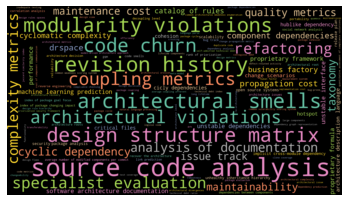

In [194]:
# Generate the WordCloud of methods
util.generateWordcloudFromFrequencies(my_methods_reviewed, 'atdmethods')

In [195]:
list_of_most_used_method = my_methods_reviewed.most_common()

counter_of_most_used_method = Counter()

for item in list_of_most_used_method:
    counter_of_most_used_method[item[0]] = item[1]

counter_of_most_used_method.most_common()

[('source code analysis', 22),
 ('architectural smells', 14),
 ('revision history', 14),
 ('design structure matrix', 13),
 ('modularity violations', 13),
 ('code churn', 12),
 ('architectural violations', 10),
 ('coupling metrics', 10),
 ('specialist evaluation', 10),
 ('refactoring', 9),
 ('complexity metrics', 8),
 ('analysis of documentation', 7),
 ('cyclic dependency', 7),
 ('taxonomy', 7),
 ('issue track', 6),
 ('maintainability', 6),
 ('maintenance cost', 6),
 ('quality metrics', 6),
 ('component dependencies', 5),
 ('drspace', 5),
 ('propagation cost', 5),
 ('business factory', 4),
 ('catalog of rules', 4),
 ('cyclomatic complexity', 4),
 ('machine learning prediction', 4),
 ('proprietary formula', 4),
 ('proprietary framework', 4),
 ('performance', 4),
 ('software architecture documentation', 4),
 ('unstable dependencies', 4),
 ('unstable interface', 4),
 ('architecture description language', 3),
 ('change scenarios', 3),
 ('cicly dependencies', 3),
 ('cohesion', 3),
 ('critic

In [196]:
from collections import defaultdict
category_of_methods = defaultdict(list)

category_of_methods['the method appears more 15 times'] = list()
category_of_methods['the method appears until 10 times'] = list()
category_of_methods['the method appears until 5 times'] = list()
category_of_methods['the method appears until 4 times'] = list()
category_of_methods['the method appears until 3 times'] = list()
category_of_methods['the method appears until 2 times'] = list()
category_of_methods['the method appears only 1 time'] = list()

for item in counter_of_most_used_method.items():
    if (item[1] <= 1):
        category_of_methods['the method appears only 1 time'].append(item[0])
    if (item[1] == 2):
        category_of_methods['the method appears until 2 times'].append(item[0])
    if (item[1] == 3):
        category_of_methods['the method appears until 3 times'].append(item[0])
    if (item[1] == 4):
        category_of_methods['the method appears until 4 times'].append(item[0])
    if (item[1]>4 and item[1]<=10):
        category_of_methods['the method appears until 5 times'].append(item[0])
    if (item[1]>10 and item[1]<=15):
        category_of_methods['the method appears until 10 times'].append(item[0])
    if (item[1]>15):
        category_of_methods['the method appears more 15 times'].append(item[0])

categories = []
count = []
kind_of_method = []

for each in category_of_methods.items():
    categories.append(each[0])
    count.append( len(each[1]) )
    kind_of_method.append(each[1])

In [197]:
my_categories = {'categories': categories, 'count':count, 'kind_of_method': kind_of_method}
my_categories_id = list(range(1,len(categories)+1))

pd.set_option('display.max_colwidth', 2000)
df_my_detailed_methods = pd.DataFrame(data=my_categories, index=my_categories_id)
df_my_detailed_methods.reset_index(drop=True, inplace=True)

# Save the latex table 
util.create_latex_table(my_df=df_my_detailed_methods, my_path='../../latex', my_file_name='mytable_q4_methods_detailed.tex')
util.create_markdown_table(my_df=df_my_detailed_methods, my_path='../../md', my_file_name='mytable_q4_methods_detailed.md')
df_my_detailed_methods

Arquivo ../../latex/mytable_q4_methods_detailed.tex  gerado com sucesso!
Arquivo ../../md/mytable_q4_methods_detailed.md  gerado com sucesso!


,categories,count,kind_of_method
0,the method appears more 15 times,1,[source code analysis]
1,the method appears until 10 times,5,"[architectural smells, revision history, design structure matrix, modularity violations, code churn]"
2,the method appears until 5 times,15,"[architectural violations, coupling metrics, specialist evaluation, refactoring, complexity metrics, analysis of documentation, cyclic dependency, taxonomy, issue track, maintainability, maintenance cost, quality metrics, component dependencies, drspace, propagation cost]"
3,the method appears until 4 times,10,"[business factory, catalog of rules, cyclomatic complexity, machine learning prediction, proprietary formula, proprietary framework, performance, software architecture documentation, unstable dependencies, unstable interface]"
4,the method appears until 3 times,14,"[architecture description language, change scenarios, cicly dependencies, cohesion, critical files, hotspot, hublike dependency, implicit cross-module dependency, open source systems, package analysis, release plan, scalability, security, unhealthy inheritance hierarchy]"
5,the method appears until 2 times,20,"[architectural root, architecture decision, architecture issues, architecture roots, average number of modified components per commit, bug track, code smells, correlation analysis, decoupling level, dependencies between components, gqm, index of package changing impact, index of package goal focus, link prediction, portability, rank of priorization, recover the architecture, reliability, reverse engineering, social network analysis]"
6,the method appears only 1 time,64,"[architectural complexity, architectural divergences, architectural erosion, architectural issue, architectural metrics, architecture level, architecture recovery, average coupling afferent, bug-prone, change propagation metric, changeability, clone coverage, code metrics, common architectural weakness enumeration, common vulerability scoring system, common weakness scoring system, compliance checking, contagious debt, cost of component communcation, crossing, defect-related activity, dependency analysis, dependency graph representation, dependency prediction, design decisions, design flaws, design metrics, design rule hierarchy, design rules spaces, design view, drh, duplicate code, efficiency, functionality, human factor, implementation cost, inadequate testing, jaccard similarity index, language parse, large components, lifetime components, logical view, long lifetime, measurement system, meta-model, microservices, model-driven architecture approach, natural language processing, package cicle, package cohesion, package coupling, package cycle, package dependencies, package evaluation, priorization securty framework, quamoco, quantitative assessment of compliance violations, re-architecting, robustness, self-admitted technical debt, technical debt index, technical debt ratio, test coverage, transferability]"


In [198]:
pd.set_option('display.max_colwidth', 80)
df_my_detailed_methods = pd.DataFrame(data=my_categories, index=my_categories_id)
df_my_detailed_methods.reset_index(drop=True, inplace=True)

# Save the latex table 
util.create_latex_table(my_df=df_my_detailed_methods, my_path='../../latex', my_file_name='mytable_q4_methods_detailed_simple.tex')

df_my_detailed_methods

Arquivo ../../latex/mytable_q4_methods_detailed_simple.tex  gerado com sucesso!


,categories,count,kind_of_method
0,the method appears more 15 times,1,[source code analysis]
1,the method appears until 10 times,5,"[architectural smells, revision history, design structure matrix, modularity..."
2,the method appears until 5 times,15,"[architectural violations, coupling metrics, specialist evaluation, refactor..."
3,the method appears until 4 times,10,"[business factory, catalog of rules, cyclomatic complexity, machine learning..."
4,the method appears until 3 times,14,"[architecture description language, change scenarios, cicly dependencies, co..."
5,the method appears until 2 times,20,"[architectural root, architecture decision, architecture issues, architectur..."
6,the method appears only 1 time,64,"[architectural complexity, architectural divergences, architectural erosion,..."
